In [1]:
import pandas as pd, numpy as np, seaborn as sbn, matplotlib.pyplot as plt

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle

In [2]:
csv_file_path = 'Data/finalists_cleaned.csv'
eurovision_df = pd.read_csv(csv_file_path, encoding='windows-1252')

In [3]:
eurovision_df

,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
0,2023,20,Norway,Pop,216.0,52.0,36.0,11.0,5.0,268.0
1,2023,5,Serbia,Pop,16.0,14.0,4.0,6.0,24.0,30.0
2,2023,2,Portugal,Pop,16.0,43.0,3.0,9.0,23.0,59.0
3,2023,25,Croatia,Pop,112.0,11.0,20.0,2.0,13.0,123.0
4,2023,3,Switzerland,Ballad,31.0,61.0,10.0,15.0,20.0,92.0
...,...,...,...,...,...,...,...,...,...,...
353,2009,3,France,Ballad,54.0,164.0,NaN,NaN,8.0,218.0
354,2009,10,Russia,Ballad,118.0,67.0,NaN,NaN,11.0,185.0
355,2009,17,Germany,Pop,18.0,73.0,NaN,NaN,20.0,91.0
356,2009,23,United Kingdom,Ballad,105.0,223.0,NaN,NaN,5.0,328.0


In [4]:
dropped_columns = ['style', 'final_televote_votes', 'final_jury_votes', 'country']
jury_televote = eurovision_df.drop(columns=dropped_columns)

In [5]:
jury_televote

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0
...,...,...,...,...,...,...
353,2009,3,54.0,164.0,8.0,218.0
354,2009,10,118.0,67.0,11.0,185.0
355,2009,17,18.0,73.0,20.0,91.0
356,2009,23,105.0,223.0,5.0,328.0


In [6]:
jury_televote.isnull().sum()

year                      0
final_draw_position       0
final_televote_points    32
final_jury_points        32
final_place               0
final_total_points        0
dtype: int64

In [7]:
# Show the rows with any null values in the jury_televote DataFrame
null_rows = jury_televote[jury_televote.isnull().any(axis=1)]

# Display the rows with null values
null_rows

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
212,2014,24,NaN,NaN,2.0,0.0
231,2013,7,NaN,NaN,20.0,0.0
232,2013,18,NaN,NaN,1.0,0.0
233,2013,10,NaN,NaN,5.0,0.0
234,2013,22,NaN,NaN,3.0,0.0
235,2013,13,NaN,NaN,9.0,0.0
236,2013,2,NaN,NaN,22.0,0.0
237,2013,8,NaN,NaN,16.0,0.0
238,2013,3,NaN,NaN,11.0,0.0
239,2013,26,NaN,NaN,26.0,0.0


In [8]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
jury_televote_imputed = pd.DataFrame(imputer.fit_transform(jury_televote), columns=jury_televote.columns)

# Display the first few rows of the imputed DataFrame
jury_televote_imputed.head()


,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023.0,20.0,216.0,52.0,5.0,268.0
1,2023.0,5.0,16.0,14.0,24.0,30.0
2,2023.0,2.0,16.0,43.0,23.0,59.0
3,2023.0,25.0,112.0,11.0,13.0,123.0
4,2023.0,3.0,31.0,61.0,20.0,92.0


In [9]:
jury_televote.head()

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0


In [10]:
# Print the column names of your DataFrame
print(jury_televote_imputed.columns)


Index(['year', 'final_draw_position', 'final_televote_points',
       'final_jury_points', 'final_place', 'final_total_points'],
      dtype='object')


In [11]:
# Check if there are any missing values in key columns (jury points and televote points)
print(jury_televote_imputed[['final_jury_points', 'final_televote_points', 'final_draw_position']].isnull().sum())


final_jury_points        0
final_televote_points    0
final_draw_position      0
dtype: int64


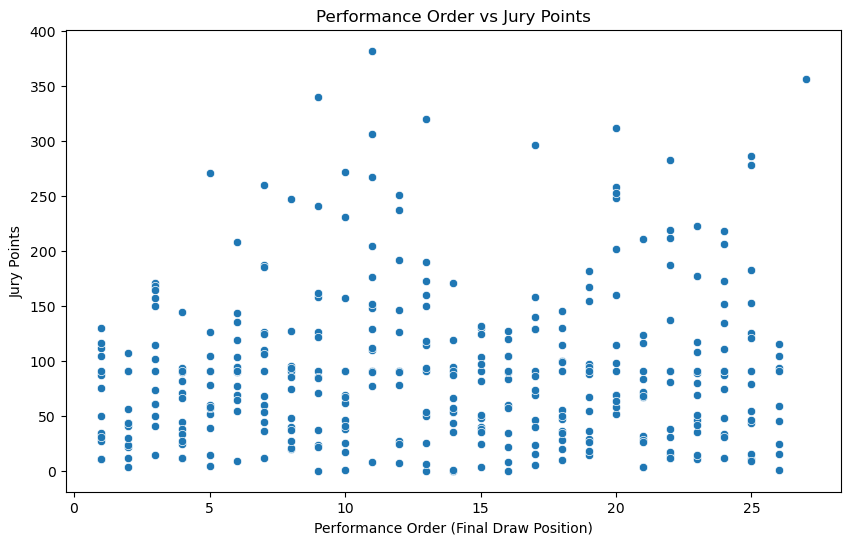

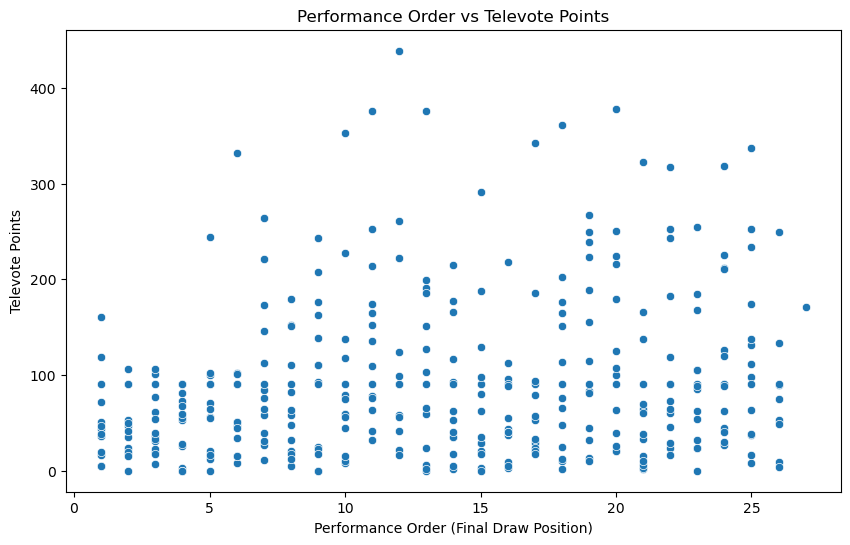

In [12]:
# Scatter plot of Performance Order vs Jury Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_jury_points')
plt.title('Performance Order vs Jury Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Jury Points')
plt.show()

# Scatter plot of Performance Order vs Televote Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_televote_points')
plt.title('Performance Order vs Televote Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Televote Points')
plt.show()

In [13]:
# Calculate the correlation between Performance Order and Jury Points
jury_corr = jury_televote_imputed[['final_draw_position', 'final_jury_points']].corr()
print("Correlation between Performance Order and Jury Points:")
print(jury_corr)

# Calculate the correlation between Performance Order and Televote Points
televote_corr = jury_televote_imputed[['final_draw_position', 'final_televote_points']].corr()
print("Correlation between Performance Order and Televote Points:")
print(televote_corr)


Correlation between Performance Order and Jury Points:
                     final_draw_position  final_jury_points
final_draw_position              1.00000            0.08098
final_jury_points                0.08098            1.00000
Correlation between Performance Order and Televote Points:
                       final_draw_position  final_televote_points
final_draw_position               1.000000               0.200002
final_televote_points             0.200002               1.000000


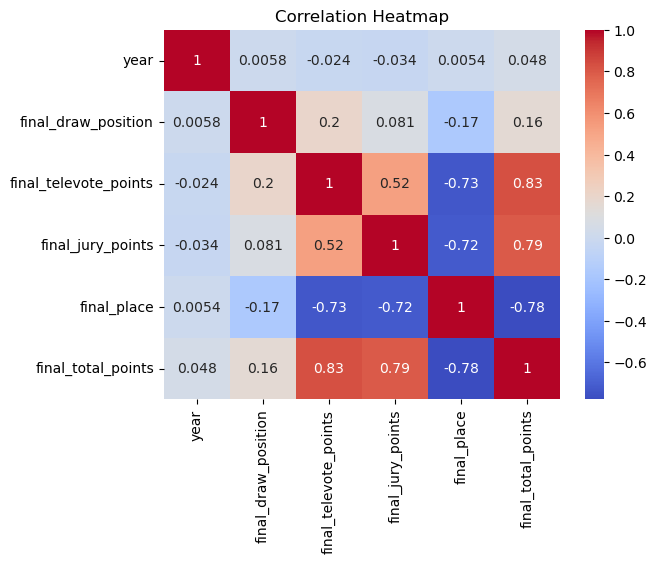

In [14]:
de.vs.correlation_heatmap(jury_televote_imputed)

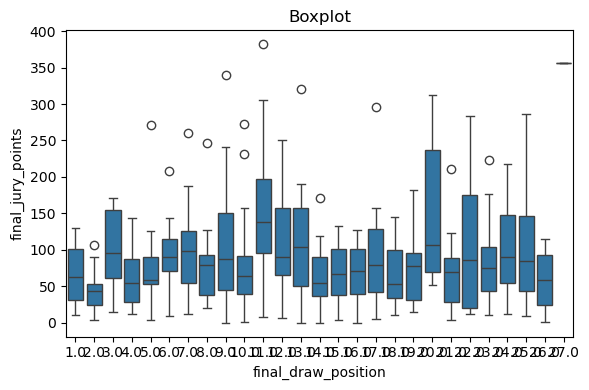

In [15]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')

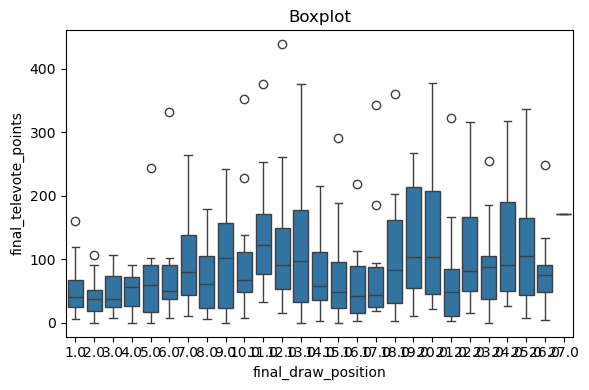

In [16]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')

<Figure size 600x400 with 0 Axes>

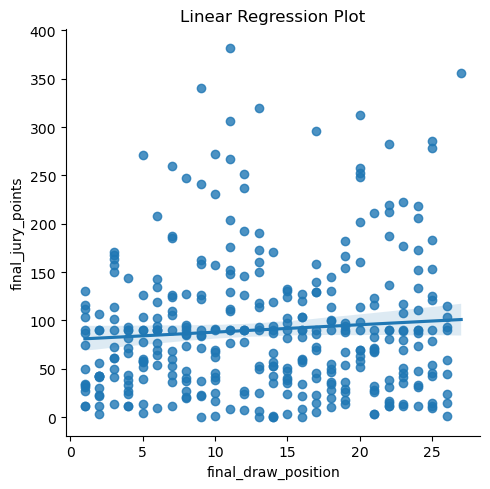

In [17]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')
# the smaller the semi_place - the better

<Figure size 600x400 with 0 Axes>

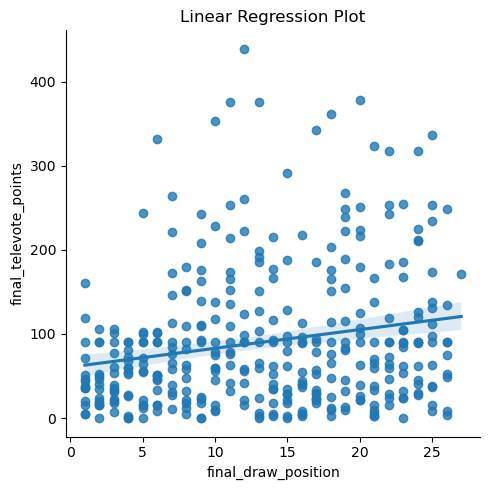

In [18]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')
# the smaller the semi_place - the better

### Using PCA to refine data for machine learning

Explained variance per component: [0.38906389 0.33225474 0.27868137]


C:\Users\jejol\AppData\Local\Temp\ipykernel_18308\2208549515.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


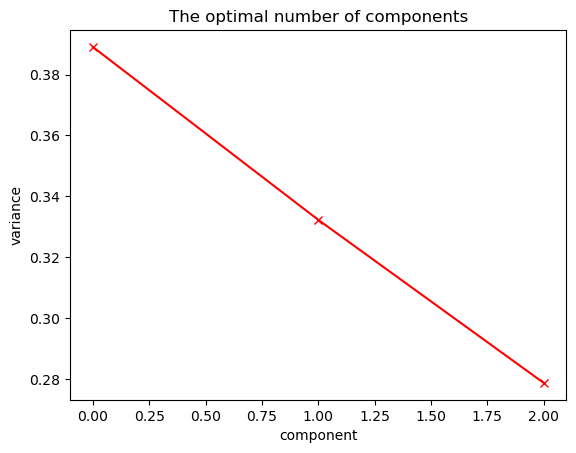

C:\Users\jejol\AppData\Local\Temp\ipykernel_18308\2208549515.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


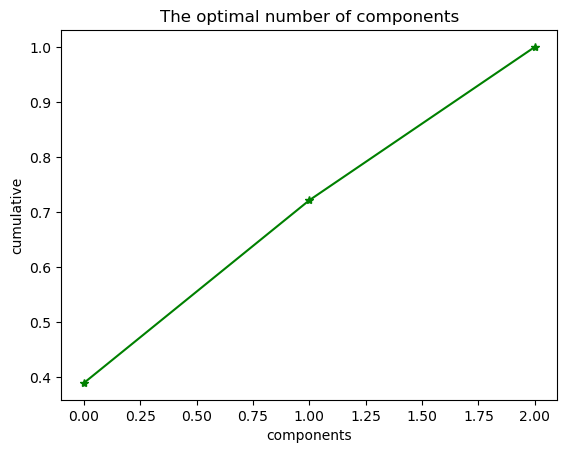

,pc 1,pc 2,pc 3
0,103.212417,5.765898,7.145185
1,-134.902951,-7.271253,7.468023
2,-105.928710,-10.510253,7.420872
3,-41.741263,11.961252,7.364754
4,-72.921619,-9.782375,7.374361
...,...,...,...
353,53.053733,-10.798425,-6.809372
354,20.112622,-3.526586,-6.749914
355,-73.826351,4.248201,-6.601489
356,163.214825,8.293915,-6.937435


In [20]:
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = jury_televote_imputed.drop(columns=['final_jury_points', 'final_televote_points', 'final_place'])  # Features


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# For now, we'll use all components and decide how many later based on the explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance to decide how many components to keep
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance per component: {explained_variance}")

# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca
pcadf = pd.DataFrame(data = X_pca, columns = ['pc 1', 'pc 2', 'pc 3'])
pcadf


### Training and testing machine learning

In [22]:
y_jury = jury_televote_imputed['final_jury_points']
y_televote = jury_televote_imputed['final_televote_points']

In [23]:
from sklearn.linear_model import LinearRegression

X_jury_train, X_jury_test, y_jury_train, y_jury_test = train_test_split(X_pca, y_jury)

jury_model = ml.train_linear_reg_model(X_jury_train, y_jury_train)

ml.evaluate_model(jury_model, X_jury_test, y_jury_test)


C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 33.37772133146804,
 'MSE': 1737.7171609429663,
 'RMSE': 41.685934809512986,
 'R2': 0.6214757676452407,
 'predictions': array([136.96503753,  53.77489815,  95.61949098, 106.01432121,
        144.74614775, 326.7036101 ,  60.27686495, 230.92080351,
        112.59640582, 103.23234249,  26.39853643, 148.37983015,
         30.35740694, 225.12235287,  67.83186287,  75.26139551,
         69.10370522,  42.95943784, 206.76928142,  60.98974481,
         62.75126974,  91.62195228,  95.10489314,  87.21861626,
         81.87848108, 174.71046183,  87.17376019,  51.66847491,
         41.44652003,  26.70306493, 141.19392698,  70.25361913,
         44.1630801 , 119.959801  , 170.00102608,  39.73240518,
         35.19230796, 122.06998848,  71.54248725,  83.17294866,
        145.28955869, 140.71701452,  34.61157265, 131.05608477,
        207.11368832,  86.01241997,  55.29754066, 145.6250933 ,
         44.43503127, 117.63456652, 117.8683409 , 129.78800666,
         59.82316614,  74.14903659, 219.10

In [24]:
X_televote_train, X_televote_test, y_televote_train, y_televote_test = train_test_split(X_pca, y_televote)

televote_model = ml.train_linear_reg_model(X_televote_train, y_televote_train)

ml.evaluate_model(televote_model, X_televote_test, y_televote_test)

C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 32.443713045511565,
 'MSE': 1706.7538170307455,
 'RMSE': 41.3128771332952,
 'R2': 0.6784657243075227,
 'predictions': array([145.39493586, 114.7947656 , 108.76400839, 195.02830572,
         51.80689756,  35.53084013, 247.98971801,  71.75007864,
         46.86485683, 123.84854404,  88.94548896,  45.34026244,
         84.4614637 , 122.28939997,  63.9826401 ,  52.23495584,
         44.81533465, 167.87822566,  79.06788381,  70.46069804,
         57.3910621 ,  55.66516832, 134.2175166 ,  97.77646571,
         34.97100864, 109.5140705 ,  25.23337234,  44.4440364 ,
        192.75202466, 170.44485598,  78.55240024,  25.98046655,
         74.94571259,  82.3317006 ,  62.56831663, 101.62168909,
         37.45084893,  71.89525327,  28.32295185,  58.46637717,
        127.85234345, 209.75791243,  27.75332211,  31.08108332,
        107.25964576,  90.70268328, 111.25067903,  44.68940248,
        177.84558874,  85.05457433, 158.09327355,  51.49504602,
         98.49522728, 110.54334027,  55.922

Mean Absolute Error (MAE) =  33.37772133146804
Mean Squared Error (MSE) =  1737.7171609429663
Root Mean Squared Error (RMSE) =  41.685934809512986
R2 (R-squared) score =  0.6214757676452407
Explained variance score =  0.6216


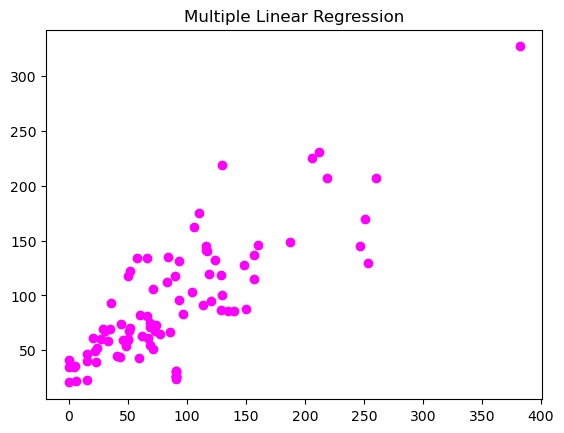

In [25]:
# JURY ERROR MARGIN
y_jury_predicted = jury_model.predict(X_jury_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_jury_test, y_jury_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_jury_test, y_jury_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_jury_test, y_jury_predicted)))


# R-squared
r2_jury_score = metrics.r2_score(y_jury_test, y_jury_predicted)
print ("R2 (R-squared) score = ", r2_jury_score)
eV_jury = round(metrics.explained_variance_score(y_jury_test, y_jury_predicted), 4)
print('Explained variance score = ',eV_jury )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_jury_test, y_jury_predicted, color='magenta')
plt.show()


Mean Absolute Error (MAE) =  32.443713045511565
Mean Squared Error (MSE) =  1706.7538170307455
Root Mean Squared Error (RMSE) =  41.3128771332952
R2 (R-squared) score =  0.6784657243075227
Explained variance score =  0.6982


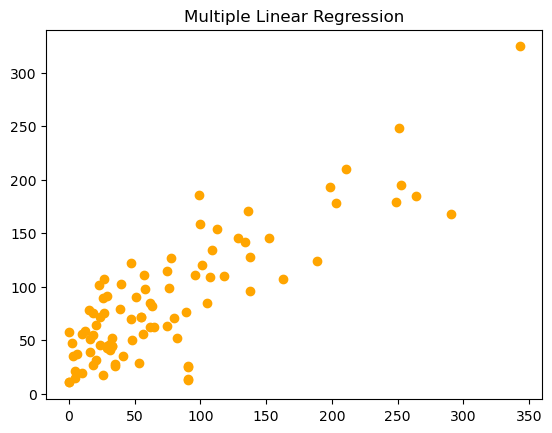

In [26]:
# TELEVOTE ERROR MARGIN
y_televote_predicted = televote_model.predict(X_televote_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_televote_test, y_televote_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_televote_test, y_televote_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_televote_test, y_televote_predicted)))


# R-squared
r2_televote_score = metrics.r2_score(y_televote_test, y_televote_predicted)
print ("R2 (R-squared) score = ", r2_televote_score)
eV_televote = round(metrics.explained_variance_score(y_televote_test, y_televote_predicted), 4)
print('Explained variance score = ',eV_televote )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_televote_test, y_televote_predicted, color='orange')
plt.show()

In [27]:
ml.save_model(jury_model, 'jury_running_order')

Model saved to: Models\jury_running_order.pkl


In [28]:
ml.save_model(televote_model, 'televote_running_order')

Model saved to: Models\televote_running_order.pkl


### ** BONUS ** MAKING CSV FILE WITH 2025 GRAND FINAL RESULTS

In [30]:
import pandas as pd
# RESULTS FROM THIS LINK: https://eurovisionworld.com/eurovision/2025

# Creating a dictionary of the data
data = {
    "year": [2025] * 26,
    "final_draw_position": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "country": ["Norway", "Luxembourg", "Estonia", "Israel", "Lithuania", "Spain", "Ukraine", "United Kingdom", "Austria", "Iceland", 
                "Latvia", "Netherlands", "Finland", "Italy", "Poland", "Germany", "Greece", "Armenia", "Switzerland", "Malta", 
                "Portugal", "Denmark", "Sweden", "France", "San Marino", "Albania"],
    "final_televote_points": [67, 24, 258, 297, 62, 10, 158, 0, 178, 33, 42, 42, 108, 97, 139, 74, 126, 30, 0, 8, 13, 2, 195, 50, 18, 173],
    "final_jury_points": [22, 23, 98, 60, 34, 27, 60, 88, 258, 0, 116, 133, 88, 159, 17, 77, 105, 42, 214, 83, 37, 45, 126, 180, 9, 45],
    "final_place": [18, 22, 3, 2, 16, 24, 9, 19, 1, 25, 13, 12, 11, 5, 14, 15, 6, 20, 10, 17, 21, 23, 4, 7, 26, 8],
    "final_total_points": [89, 47, 356, 357, 96, 37, 218, 88, 436, 33, 158, 175, 196, 256, 156, 151, 231, 72, 214, 91, 50, 47, 321, 230, 27, 218]
}

df = pd.DataFrame(data)

# Save to CSV
# df.to_csv("Data/eurovision_2025_grand_final.csv", index=False)

df.head()


,year,final_draw_position,country,final_televote_points,final_jury_points,final_place,final_total_points
0,2025,1,Norway,67,22,18,89
1,2025,2,Luxembourg,24,23,22,47
2,2025,3,Estonia,258,98,3,356
3,2025,4,Israel,297,60,2,357
4,2025,5,Lithuania,62,34,16,96
